# Sleep healt and Lifestyle analysis
#### Created by Bogdan Rivera
In this repository, we analyze a data set on the relationship between health and lifestyle. We have variables such as Gender, Age, Occupation, among others.
The proposite of this analysis is compare some attributes that contribute to the deterioration of health.

Importing dependences

In [19]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

First, we open the data to view all columns in the dataset

In [20]:
data = pd.read_csv("/content/healt.csv")
#Data visualitation
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


First, we see the average of Sleep duration (hours)

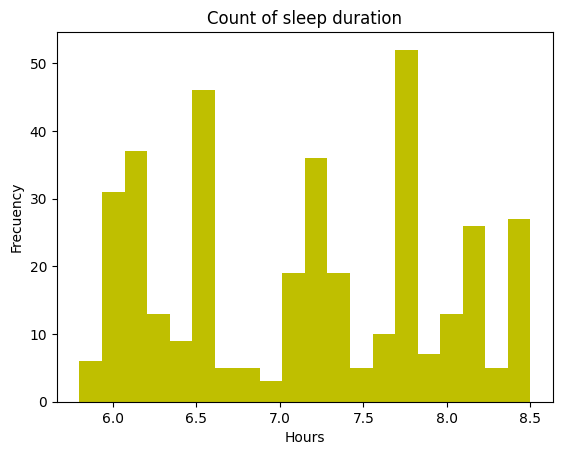

In [21]:
fig, ax = plt.subplots()
ax.set_title("Count of sleep duration")
ax.set_xlabel("Hours")
ax.set_ylabel("Frecuency")
ax.hist(data['Sleep Duration'],color='y',bins = 20)
plt.show()

In the graph, we see the max value of the frequency of hours is between 7.5 and 8.0 hours. If the data are grouped by occupation, we can see what is the career with more sleep hours.


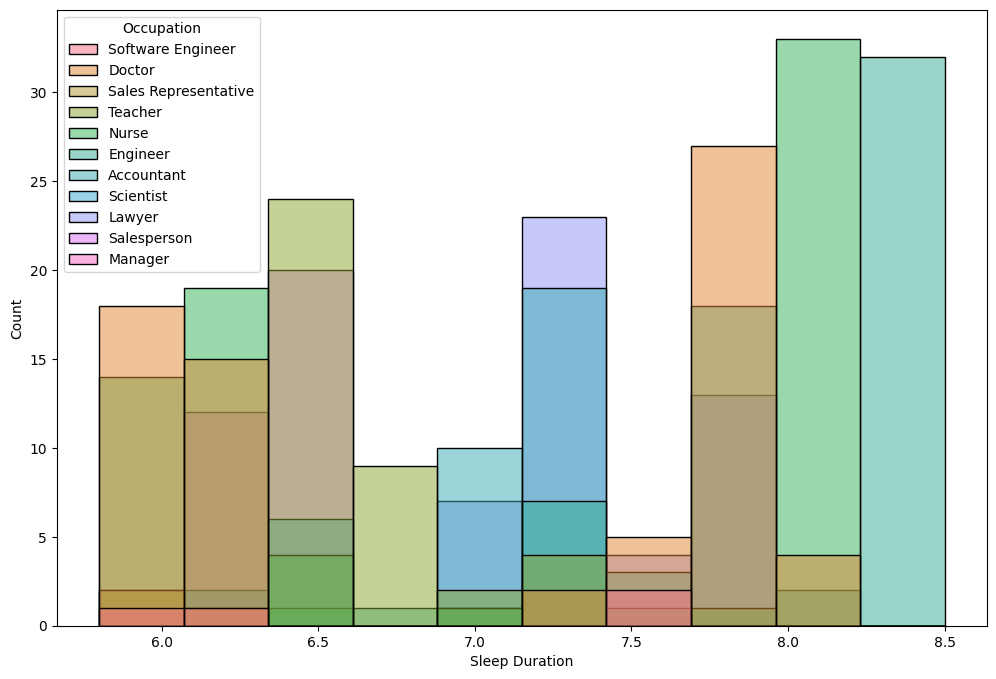

In [22]:
plt.figure(figsize=(12,8))
sleep_hours = sns.histplot(data, x=data['Sleep Duration'], hue='Occupation')
plt.show()

In the graph, the occupation with the longest sleep duration is nursing, followed by engineering and doctor.
In the same way, we can see the Physical Activity Level in relation to the occupation.

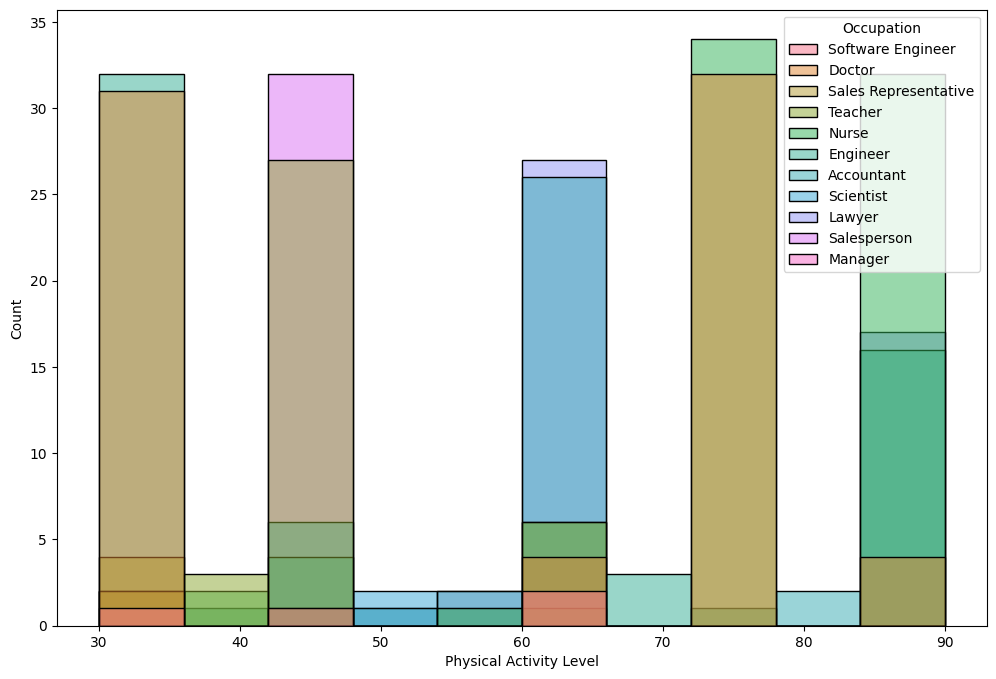

In [23]:
plt.figure(figsize = (12,8))
Phis_act = sns.histplot(data,x = data['Physical Activity Level'],hue = 'Occupation')

We the average of the sleep hours

In [24]:
average = data['Sleep Duration'].mean()
print("Average of Sleep duration:",average,"hours")

Average of Sleep duration: 7.132085561497325 hours


In average, people sleeps 7 hours.

Other measures of central tendency are the median and mode

In [25]:
med = data['Sleep Duration'].median()
mod = data['Sleep Duration'].mode()[0]
print("Median of Sleep duration:",med,"hours")
print("Mode of Sleep duration:",mod,"hours")



Median of Sleep duration: 7.2 hours
Mode of Sleep duration: 7.2 hours


We can use a scatter plot to see the relation with other variables.

In [26]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


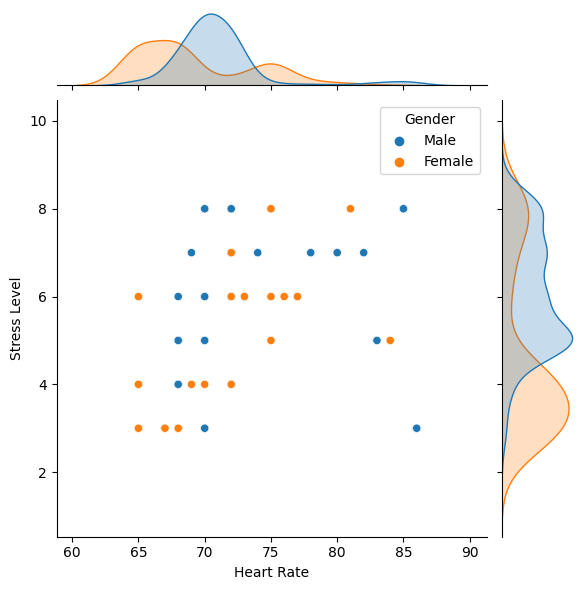

In [83]:
sns.jointplot(data=data,x=data['Heart Rate'],y=data['Stress Level'],hue='Gender')
plt.show()

If we group by gender we can see a correlation of that variables.

If we use a boxplot to see the outliers in this case.

<Axes: xlabel='Gender', ylabel='Stress Level'>

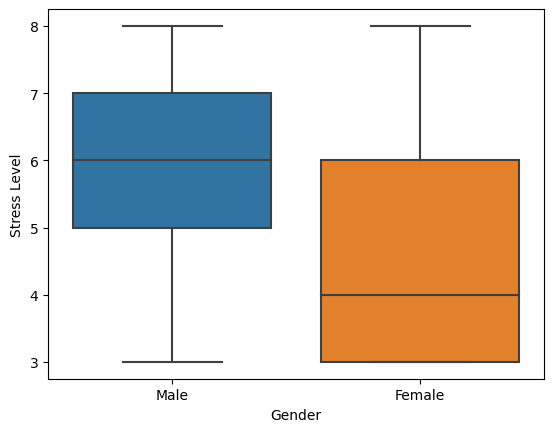

In [28]:
sns.boxplot(data=data,x='Gender',y=data['Stress Level'])

The median in the stress level of male gender is approximately 6 and the median in female is approximately 4.

To see more information about relations of variables, use a covariance matrix only for numeric columns.

In [29]:
print(data.columns)
clean = data.dropna()

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [30]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
    clean[['Sleep Duration','Quality of Sleep','Physical Activity Level',
           'Stress Level','Heart Rate','Daily Steps']]
)
cov_matrix = np.cov(scaled.T)
cov_matrix

array([[ 1.00268097,  0.88558086,  0.21292965, -0.81319735, -0.51783949,
        -0.03963852],
       [ 0.88558086,  1.00268097,  0.1934136 , -0.90116155, -0.66163381,
         0.01683643],
       [ 0.21292965,  0.1934136 ,  1.00268097, -0.03422598,  0.1373382 ,
         0.77479469],
       [-0.81319735, -0.90116155, -0.03422598,  1.00268097,  0.67182278,
         0.18732984],
       [-0.51783949, -0.66163381,  0.1373382 ,  0.67182278,  1.00268097,
        -0.03038983],
       [-0.03963852,  0.01683643,  0.77479469,  0.18732984, -0.03038983,
         1.00268097]])

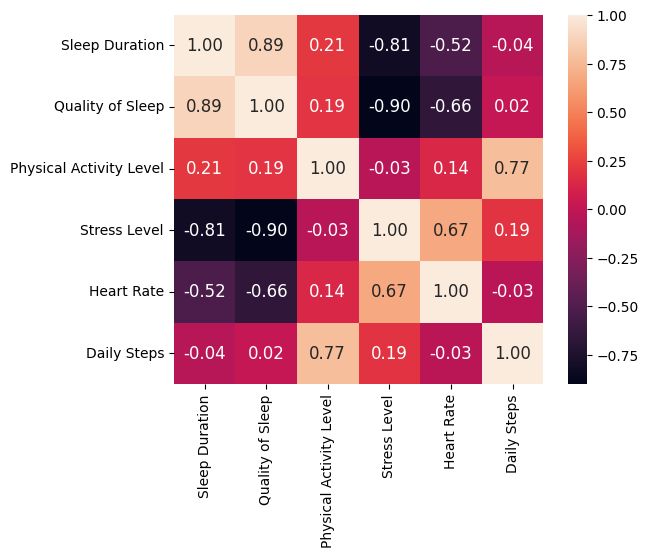

In [31]:
hm = sns.heatmap(cov_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels = ['Sleep Duration','Quality of Sleep','Physical Activity Level',
           'Stress Level','Heart Rate','Daily Steps'],
                 xticklabels=['Sleep Duration','Quality of Sleep','Physical Activity Level',
           'Stress Level','Heart Rate','Daily Steps'])

# PCA
In this section we can use PCA analysis to obtain the minimum and visualize data.

In [41]:
# Using the covariance matrix then calculate the eigen values and eigen vectors
eigen_values , eigen_vectors =  eig(cov_matrix)
values = pd.DataFrame(scaled @ eigen_vectors,
                          columns=['Sleep Duration','Quality of Sleep','Physical Activity Level',
           'Stress Level','Heart Rate','Daily Steps'])


     Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level  \
0         -2.152071         -1.639661                 1.082967      0.745745   
1         -2.482852          1.526223                -0.589971     -0.443442   
2         -2.482852          1.526223                -0.589971     -0.443442   
3         -4.614197         -2.370323                 2.325624      0.190261   
4         -4.614197         -2.370323                 2.325624      0.190261   
..              ...               ...                      ...           ...   
369        2.347538          0.574955                 0.509275      0.218909   
370        2.284229          0.568329                 0.463518      0.306494   
371        2.347538          0.574955                 0.509275      0.218909   
372        2.347538          0.574955                 0.509275      0.218909   
373        2.347538          0.574955                 0.509275      0.218909   

     Heart Rate  Daily Steps  
0      0

In [80]:
# Obtención de componentes principales
pca = PCA(n_components=2)
data_pca = pca.fit(scaled)

The explained variance is:

In [81]:
print("Explained variance: ",pca.explained_variance_ratio_*100)
reduced_scaled = pca.transform(scaled)

Explained variance:  [54.20247115 30.08822307]


We use the principal components to visualization.

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'pca_1', 'pca_2'],
      dtype='object')


<Axes: xlabel='pca_1', ylabel='pca_2'>

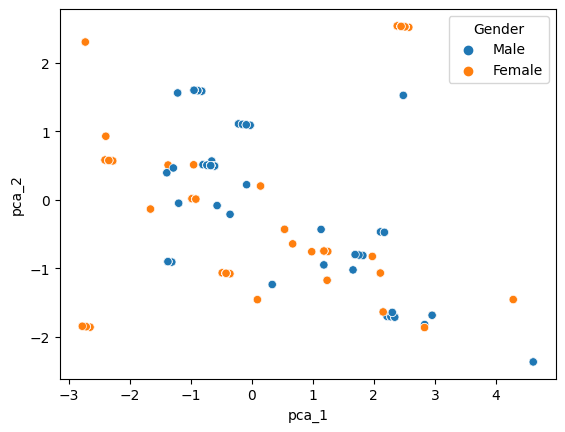

In [82]:
data['pca_1'] = reduced_scaled[:,0]
data['pca_2'] = reduced_scaled[:,1]
print(data.columns)
sns.scatterplot(data,x = data.pca_1,y = data.pca_2,hue='Gender')


In this case no exist a clear relation on the variables.

From the covariance matrix you can see the highest relationship of the elements, and there is the relation of Quality sleep and Sleep duration.

<Axes: xlabel='Quality of Sleep', ylabel='Sleep Duration'>

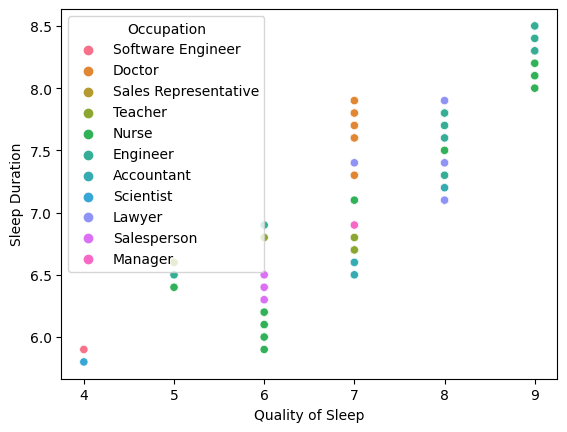

In [85]:
sns.scatterplot(data,x = data['Quality of Sleep'],y = data['Sleep Duration'],hue = 'Occupation')

Another variables who are relationated is the daily steps and physical activity level.




<Axes: xlabel='Daily Steps', ylabel='Physical Activity Level'>

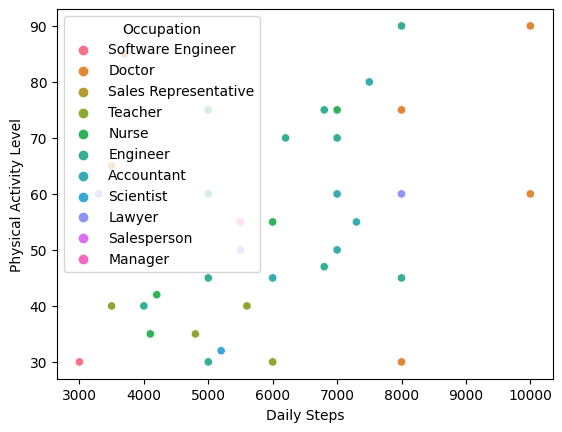

In [86]:
sns.scatterplot(data,y = data['Physical Activity Level'],x = data['Daily Steps'],hue = 'Occupation')

# Conclusion
According to this work, there seems to be no relationship between a person's occupation and health. In the same way, a relationship that could be (although not entirely) is gender and stress level, but according to the calculations made, there is no direct relationship as such, so it seems that other factors such as diet should be analyzed. and performing physical activity.